In [ ]:
#teoria:
#http://scikit-learn.org/stable/modules/mixture.html

#exemplo iris:
#http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py

#http://bhanustuff.blogspot.com/2017/07/GMM-implementation-code-Python.html

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import random as rand
from sklearn import datasets


In [10]:
from sklearn.mixture import GaussianMixture as mix

In [12]:
iris_aux = datasets.load_iris()
iris = pd.DataFrame(iris_aux.data, columns=iris_aux.feature_names)
iris['target'] = pd.Series(iris_aux.target)
iris['species'] = pd.Categorical.from_codes(iris_aux.target, iris_aux.target_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [13]:
X = iris.iloc[:,:4]
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [14]:
Y = iris.iloc[:,4]
Y

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [18]:
gmm = mix(n_components=3, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', 
    weights_init=None, means_init=None,
    precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)

In [19]:
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [26]:
labels = gmm.predict(X)

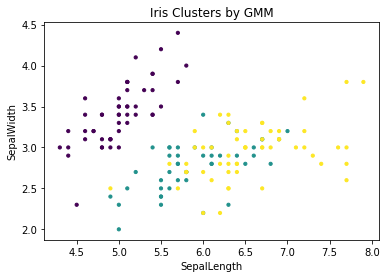

In [28]:
plt.scatter(X.iloc[:, 0], X.iloc[:,1], s = 10, c = labels, label = '')
plt.title('Iris Clusters by GMM')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
 
plt.show()